In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import warnings

In [103]:
Bhuvi_vids = pd.read_csv('https://raw.githubusercontent.com/BhavanishDhamnaskar/tik_data/main/sug_users_vids_all.csv')
Bhuvi_vids1 = pd.read_csv('https://raw.githubusercontent.com/BhavanishDhamnaskar/tik_data/main/sug_users_vids1.csv')
Bhuvi_vids2 = pd.read_csv('https://raw.githubusercontent.com/BhavanishDhamnaskar/tik_data/main/sug_users_vids2.csv')
Bhuvi_vids3 = pd.read_csv('https://raw.githubusercontent.com/BhavanishDhamnaskar/tik_data/main/sug_users_vids3.csv')
Bhuvi_vids4 = pd.read_csv('https://raw.githubusercontent.com/BhavanishDhamnaskar/tik_data/main/sug_users_vids4.csv')
Bhuvi_vids5 = pd.read_csv('https://raw.githubusercontent.com/BhavanishDhamnaskar/tik_data/main/top_users_vids.csv')

In [104]:
dfs = [Bhuvi_vids, Bhuvi_vids1, Bhuvi_vids2, Bhuvi_vids3, Bhuvi_vids4, Bhuvi_vids5]

for df in dfs:
    print(f'{df.shape}.')

data = pd.concat(dfs)

(41702, 13).
(11921, 13).
(11903, 13).
(12677, 13).
(5201, 13).
(12559, 13).


In [105]:
data.shape

(95963, 13)

In [106]:
data.info

<bound method DataFrame.info of                         id  create_time    user_name  \
0      6892428462015958273   1604768557  john.cena10   
1      6891790235336822018   1604619960  john.cena10   
2      6891264678832475393   1604497592  john.cena10   
3      6891050048403049730   1604447622  john.cena10   
4      6890886086613126402   1604409445  john.cena10   
...                    ...          ...          ...   
12554  6876829707153820933   1601136733       sarati   
12555  6876466118068931845   1601052092       sarati   
12556  6876456742780275973   1601049906       sarati   
12557  6876117050423594246   1600970815       sarati   
12558  6876102133977074950   1600967337       sarati   

                                                hashtags  \
0      ['johncena', 'love', 'tiktok', 'fyp', 'foryoup...   
1      ['johncena', 'love', 'tiktok', 'halloween', 'q...   
2              ['johncena', 'love', 'fyp', 'foryoupage']   
3      ['johncena', 'fyp', 'foryoupage', 'viral', 'co..

In [107]:
data.duplicated().sum()

43119

In [108]:
display(data[data.duplicated(subset = 'id')])

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
36501,6892139103526096134,1604701219,thetoiley,['2prettybestfriends'],original sound,14,765,2,54,4353,2000000,22400000,577
36502,6891813370060705029,1604625377,thetoiley,['balloons'],positions,21,812,4,132,5797,2000000,22400000,577
36503,6890241204957482245,1604259328,thetoiley,['duet'],The mummy,37,1955,8,97,12500,2000000,22400000,577
36504,6889052796541308165,1603982672,thetoiley,"['dinosaur', 'scary', 'chase']",original sound,8,13100,16,150,66600,2000000,22400000,577
36505,6888460558564150534,1603844741,thetoiley,['audition'],original sound,4,22500,17,429,106800,2000000,22400000,577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12329,6877624911511293190,1601321870,sherinicolee,"['foryou', 'ToMyBestFriend']",THICK,15,1900000,5426,11100,9900000,12100000,268500000,179
12330,6875861928237927686,1600911473,sherinicolee,['duet'],Glorious (feat. Skylar Grey),15,1100000,1460,6244,5700000,12100000,268500000,179
12331,6875418939032177926,1600808248,sherinicolee,"['faceurstrength', 'ad']",thank you guys so much for using this sound,36,631100,854,4284,3700000,12100000,268500000,179
12332,6874298919354928390,1600547452,sherinicolee,['duet'],Happiest Year,10,926800,834,5604,4900000,12100000,268500000,179


In [109]:
result = data.loc[data['id'] == 6892139103526096134]

In [110]:
data[data['id']==6877624911511293190]

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
22149,6877624911511293190,1601321870,sherinicolee,"['foryou', 'ToMyBestFriend']",THICK,15,1900000,5426,11100,9900000,12100000,268600000,179
10228,6877624911511293190,1601321870,sherinicolee,"['foryou', 'ToMyBestFriend']",THICK,15,1900000,5426,11100,9900000,12100000,268600000,179
12329,6877624911511293190,1601321870,sherinicolee,"['foryou', 'ToMyBestFriend']",THICK,15,1900000,5426,11100,9900000,12100000,268500000,179


In [111]:
data.dtypes

id                int64
create_time       int64
user_name        object
hashtags         object
song             object
video_length      int64
n_likes           int64
n_shares          int64
n_comments        int64
n_plays           int64
n_followers       int64
n_total_likes     int64
n_total_vids      int64
dtype: object

In [112]:
data.rename(columns={'id': 'ID',
                    'create_time': 'Create Time',
                    'user_name': 'User',
                    'hashtags': 'Hashtags',
                    'song': 'Song Title',
                    'video_length': 'Length',
                    'n_likes': 'Likes',
                    'n_shares': 'Shares',
                    'n_comments': 'Comments',
                    'n_plays': 'Views',
                    'n_followers': 'Followers',
                    'n_total_likes': 'Total Likes',
                    'n_total_vids': 'Total Videos'}, inplace = True)

In [113]:
data['Create Time'] = pd.to_datetime(data['Create Time'], unit = 's')

In [114]:
data.head(3)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos
0,6892428462015958273,2020-11-07 17:02:37,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,1000000,4700000,211
1,6891790235336822018,2020-11-05 23:46:00,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,1000000,4700000,211
2,6891264678832475393,2020-11-04 13:46:32,john.cena10,"['johncena', 'love', 'fyp', 'foryoupage']",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,4700000,211


In [115]:
# Calculate total engagement and engagement rate.
data['Engagement'] = data['Likes'] + data['Shares'] + data['Comments'] + data['Views']
# The industry standard in social media is used below for the calculation of Engagement Rate's numerator.
data['Engagement Rate'] = np.where(data['Followers'] == 0, 0, ((data['Likes'] + data['Shares'] + data['Comments']) / data['Followers']))

In [116]:
data['Engagement Rate'].describe()

count    95963.000000
mean         0.070412
std          0.211382
min          0.000000
25%          0.008909
50%          0.023869
75%          0.062252
max         14.970815
Name: Engagement Rate, dtype: float64

In [117]:
data.corr()

<ipython-input-117-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,ID,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Engagement,Engagement Rate
ID,1.000000,0.012102,-0.026645,-0.008541,-0.041311,-0.036858,0.011214,0.027138,0.042168,-0.036412,-0.022409
Length,0.012102,1.000000,0.000386,0.021520,-0.007950,-0.016413,-0.026485,-0.036489,-0.030850,-0.014886,0.010284
Likes,-0.026645,0.000386,1.000000,0.632638,0.549879,0.829241,0.456453,0.325773,-0.020908,0.860272,0.330062
Shares,-0.008541,0.021520,0.632638,1.000000,0.480169,0.578607,0.181293,0.118440,-0.027799,0.594923,0.280792
Comments,-0.041311,-0.007950,0.549879,0.480169,1.000000,0.587113,0.242941,0.208119,-0.008436,0.594282,0.225842
Views,-0.036858,-0.016413,0.829241,0.578607,0.587113,1.000000,0.349016,0.218101,-0.029555,0.998312,0.322426
Followers,0.011214,-0.026485,0.456453,0.181293,0.242941,0.349016,1.000000,0.822886,0.397787,0.365573,-0.057612
Total Likes,0.027138,-0.036489,0.325773,0.118440,0.208119,0.218101,0.822886,1.000000,0.533192,0.232731,-0.057939
Total Videos,0.042168,-0.030850,-0.020908,-0.027799,-0.008436,-0.029555,0.397787,0.533192,1.000000,-0.029139,-0.141761
Engagement,-0.036412,-0.014886,0.860272,0.594923,0.594282,0.998312,0.365573,0.232731,-0.029139,1.000000,0.328570


<ipython-input-118-efdd010695cc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

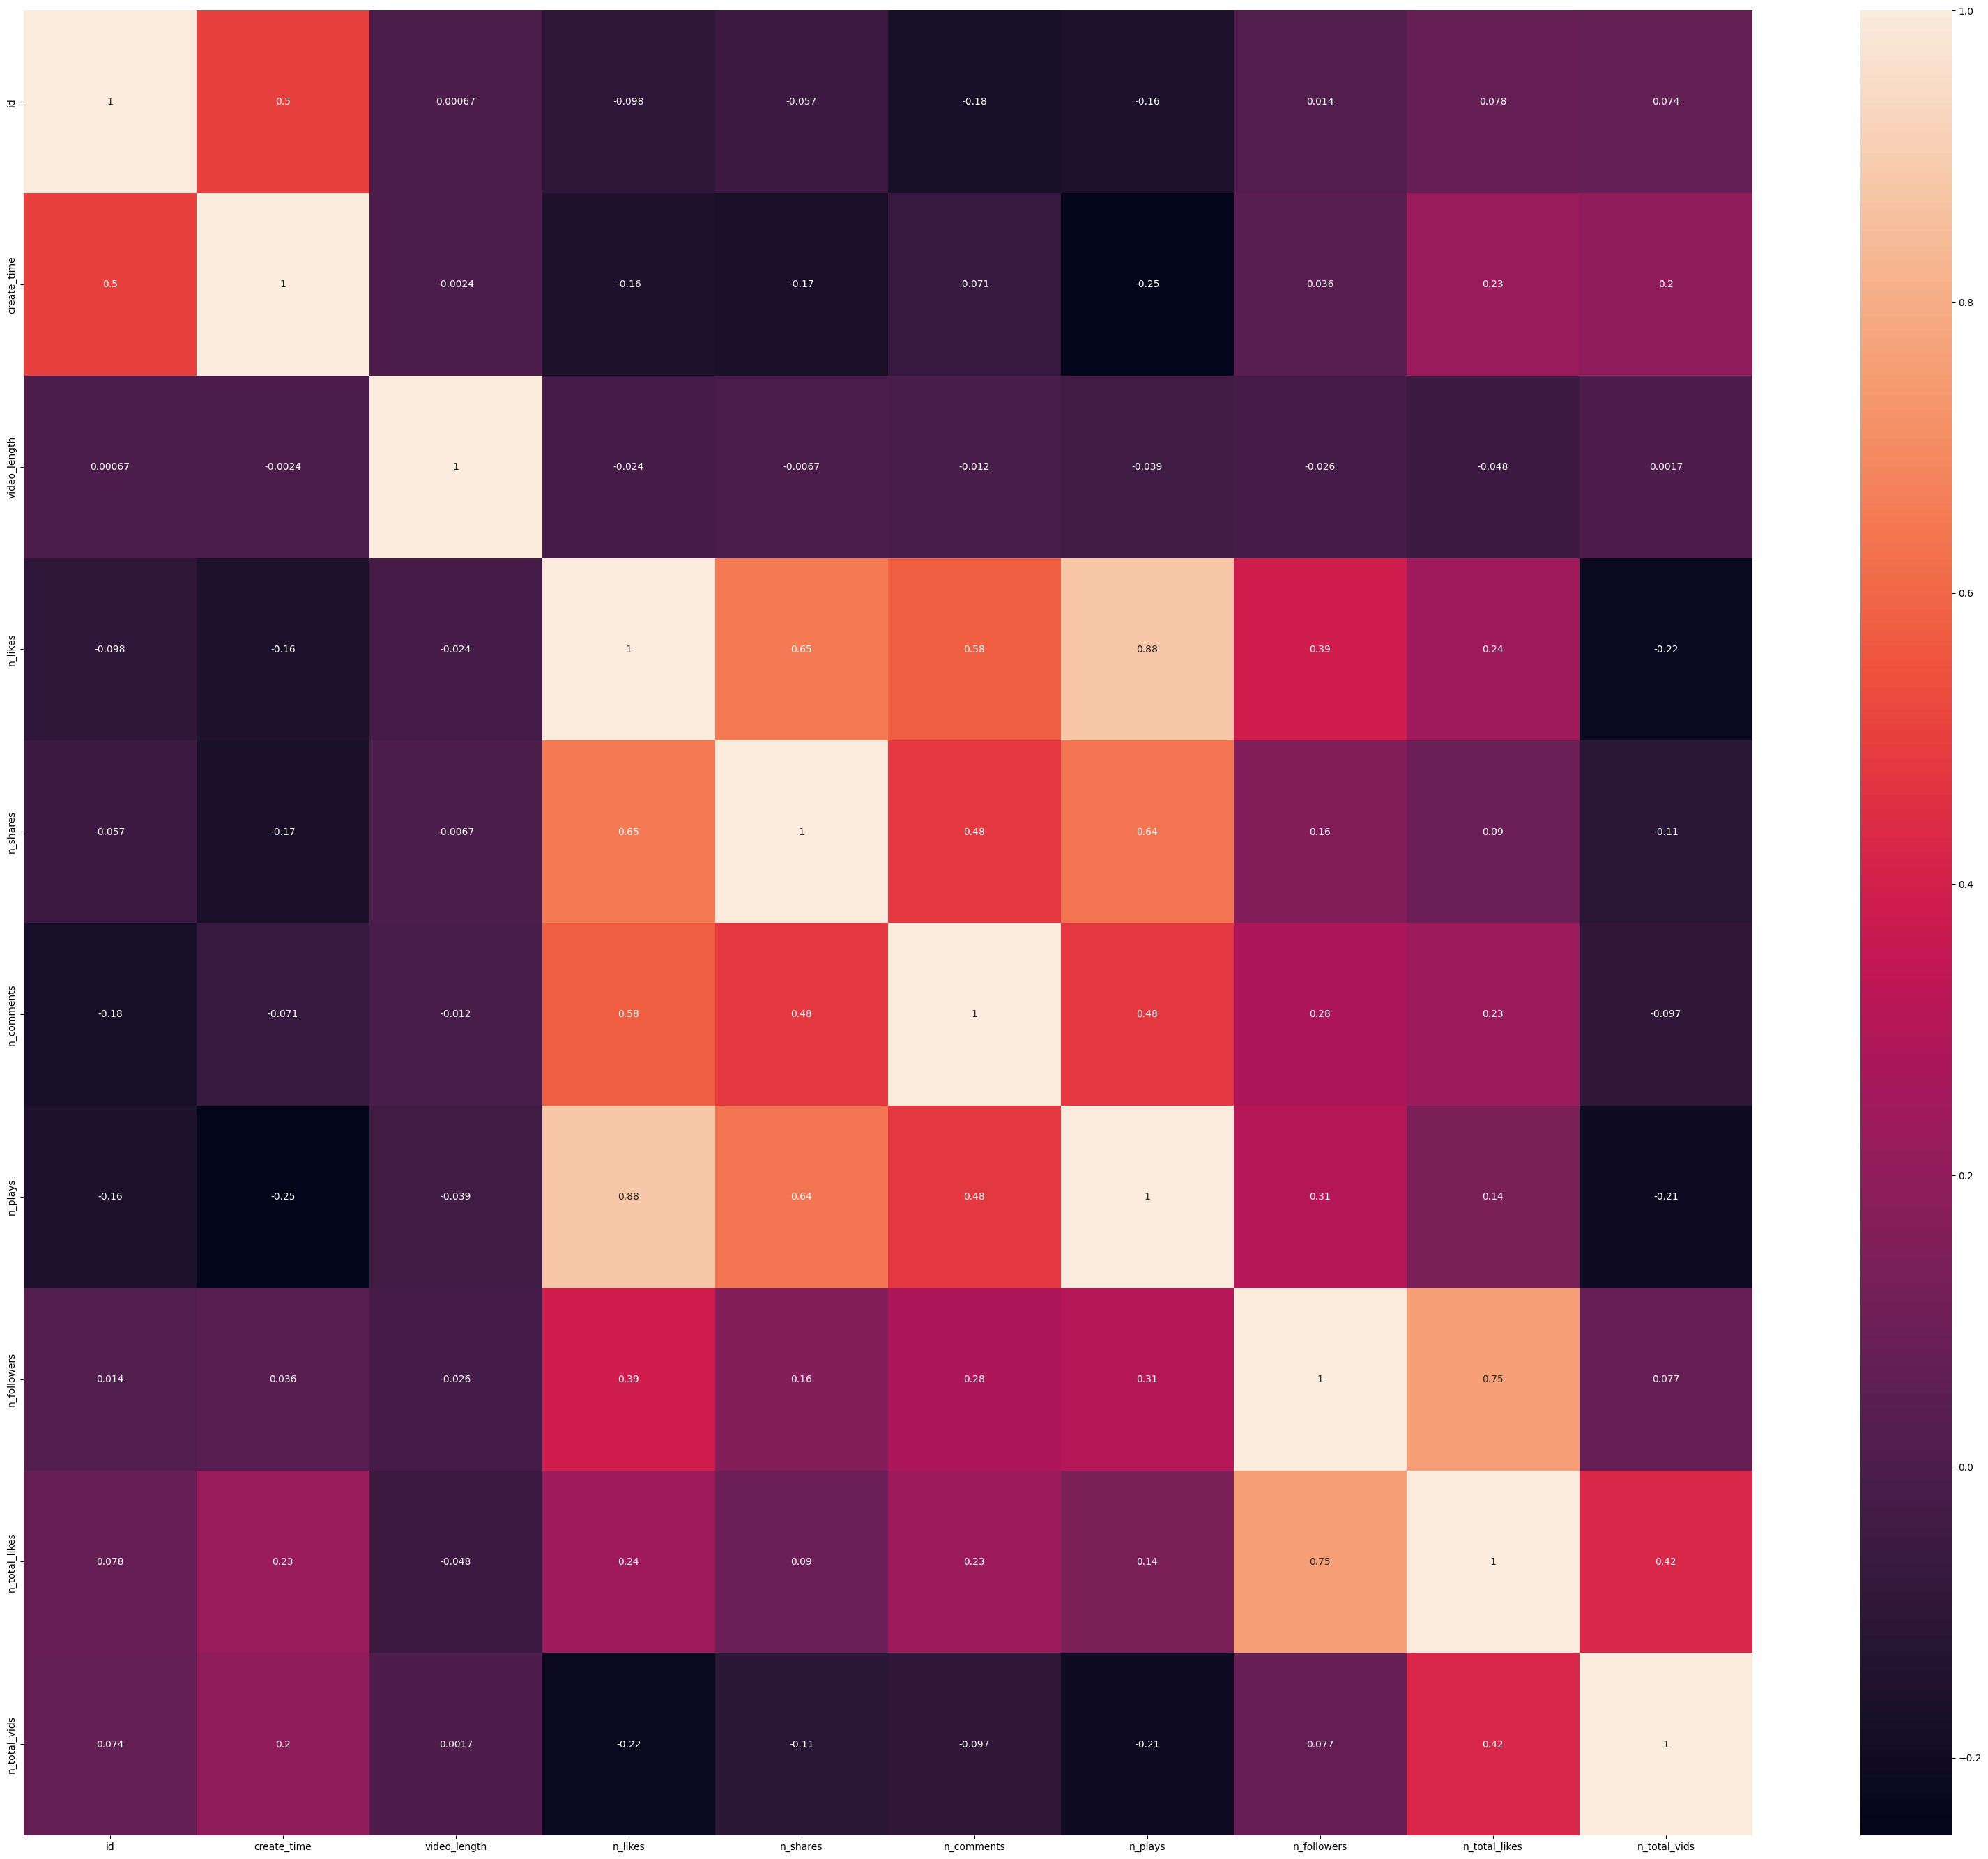

In [118]:
plt.figure(figsize=(40, 34))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [119]:
data.groupby(['Song Title']).mean().sort_values(by = 'Views', ascending = False)

<ipython-input-119-5800a9fff512>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ID,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Engagement,Engagement Rate
Song Title,,,,,,,,,,,
Kill Em With Kindness,9.944372e+16,15.0,15700000.0,62400.0,957100.0,202800000.0,25500000.0,67300000.0,24.0,219519500.0,0.655667
original sound - Rowhi Rai,6.792912e+18,55.0,3400000.0,44900.0,8766.0,191800000.0,17300000.0,145200000.0,140.0,195253666.0,0.199634
bestfriendscheck,6.768158e+18,12.0,22400000.0,412200.0,157000.0,168600000.0,29500000.0,160200000.0,30.0,191569200.0,0.778617
Spence's original sound,6.716138e+18,14.0,7400000.0,107500.0,60900.0,116000000.0,13600000.0,84800000.0,61.0,123568400.0,0.556500
Nimbu Ko Kaise Toddoge??🤫,6.789964e+18,14.0,5900000.0,114400.0,7226.0,107300000.0,8800000.0,97100000.0,108.0,113321626.0,0.684276
...,...,...,...,...,...,...,...,...,...,...,...
You Lost Me,6.891491e+18,19.0,9.0,0.0,0.0,38.0,77200.0,889300.0,1366.0,47.0,0.000117
feel something,6.892153e+18,4.0,4.0,0.0,4.0,34.0,8370.0,24300.0,111.0,42.0,0.000956
Amigos Especiales,6.891857e+18,7.0,6.0,0.0,2.0,26.0,8370.0,24300.0,111.0,34.0,0.000956


In [120]:
n_uses = data['Song Title'].value_counts()

In [121]:
n_uses[n_uses >= 20]

original sound            43744
sonido original            5649
оригинальный звук          1636
som original               1389
Originalton                 653
                          ...  
summertime                   20
Lilcobaine Let it Play       20
big and chunky               20
Low Volume At 4 AM           20
hatchback                    20
Name: Song Title, Length: 355, dtype: int64

In [122]:
# Filter for songs used more than 25 times.
hot_songs = data[data['Song Title'].isin(n_uses[n_uses >= 20].index)]

In [123]:
#Add column for number of uses for each song in filtered df.
hot_songs['Song Uses'] = hot_songs['Song Title'].map(hot_songs['Song Title'].value_counts())

<ipython-input-123-b2b9f7eb16b3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
hot_songs['Song Title'].value_counts()

original sound           43744
sonido original           5649
оригинальный звук         1636
som original              1389
Originalton                653
                         ...  
summertime                  20
quincynsb go daddy go       20
윱콩동물챌린지                     20
Wink Wink                   20
Mr. Blue Sky                20
Name: Song Title, Length: 355, dtype: int64

In [125]:
hot_songs.sample(4)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Engagement,Engagement Rate,Song Uses
6264,6879164414583524613,2020-10-02 23:11:53,thesupercole,[],original sound,15,1700000,9754,14900,8100000,17200000,334800000,564,9824654,0.100271,43744
7992,6872052226332904709,2020-09-13 19:12:36,jlo,"['Hustlers', 'Ramona', 'WAP', 'WAPchallenge']",WAP（feat. Megan Thee Stallion）,15,819600,27400,10900,6100000,11700000,69600000,94,6957900,0.073325,213
5943,6841892741870341377,2020-06-24 12:38:14,anammidarbar,"['Atrangz', 'Bff', 'Bestfriendgoals', 'Hairdye...",original sound,35,81800,71,189,816700,8300000,206400000,1195,898760,0.009887,43744
24778,6884338744200105217,2020-10-16 21:50:24,benjikrol.es,[],Original Sound,11,229700,650,2124,729300,2000000,37500000,86,961774,0.116237,388


In [126]:
windows = hot_songs.groupby('Song Title')['Create Time'].agg(Min = 'min',
                              Max = 'max').reset_index()

In [127]:
delta = windows['Max'] - windows['Min']
windows['Window'] = delta.dt.days

In [128]:
windows.head()

,Song Title,Min,Max,Window
0,#hiteverybeat,2020-03-08 22:20:38,2020-10-28 20:45:51,233
1,1982,2020-08-01 11:07:12,2020-11-07 18:33:43,98
2,2 on Tinashe slowed and reverb,2020-09-26 20:19:10,2020-11-04 18:17:26,38
3,A Moment Apart - ODESZA,2020-06-23 21:04:49,2020-11-01 20:38:33,130
4,A body has been discovered vxamber,2020-10-06 23:45:42,2020-11-01 04:57:13,25


In [129]:
windows['Window'].mean()

103.34647887323943

In [130]:
hot_songs = pd.merge(hot_songs, windows)
hot_songs.sample(5)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window
69883,6891989148027079938,2020-11-06 12:37:51,zon_kis,"['korean', '틱톡뷰티']",Kismet,8,9988,23,173,45100,3000000,33200000,141,55284,0.003395,34,2020-08-04 11:56:53,2020-11-06 12:37:51,94
64953,6873501353902165254,2020-09-17 16:55:59,parisberelc,"['voiceeffects', 'youhaveto', 'wisconsin']",A Moment Apart - ODESZA,15,691600,1128,7094,2400000,2100000,33100000,69,3099822,0.333249,44,2020-06-23 21:04:49,2020-11-01 20:38:33,130
46649,6760316395759619333,2019-11-17 16:40:20,kyliejenner,[],All I Want for Christmas Is You,9,619400,1306,2996,9900000,20100000,156000000,49,10523702,0.031030,22,2019-11-17 16:40:20,2020-11-06 22:11:47,355
68038,6885424053721615618,2020-10-19 20:01:56,sebastianyatra,"['ChicaIdeal', 'ChicaidealChallenge']",Chica Ideal,15,982300,10100,6881,7600000,11600000,76700000,145,8599281,0.086145,69,2020-10-18 19:32:23,2020-11-07 18:20:25,19
23392,6880225542382079238,2020-10-05 19:49:35,benazelart,[],original sound,9,272700,1943,3551,1300000,11400000,285700000,366,1578194,0.024403,43744,2015-12-01 13:31:05,2020-11-08 01:52:50,1803


In [131]:
hot_songs['Window Pos'] = ((hot_songs['Create Time'] - hot_songs['Min']) / (hot_songs['Max'] - hot_songs['Min'])) * 100

In [132]:
hot_songs['Days Since Debut'] = hot_songs.groupby('Song Title')['Create Time'].transform(lambda x: (x-x.min()).dt.days)

In [133]:
hot_songs[hot_songs['Song Title'] == 'Spooky, Scary Skeletons'].sort_values('Days Since Debut', ascending = True)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,...,Total Likes,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window,Window Pos,Days Since Debut
63676,6753669548739677446,2019-10-30 18:47:14,willsmith,[],"Spooky, Scary Skeletons",16,4700000,68800,21300,30200000,...,210300000,51,34990100,0.116832,87,2019-10-30 18:47:14,2020-11-07 21:55:02,374,0.000000,0
63682,6877179125308722434,2020-09-27 14:47:24,neffatibrothers,['spookyseason'],"Spooky, Scary Skeletons",10,702500,1163,1363,5300000,...,313200000,653,6005026,0.057789,87,2019-10-30 18:47:14,2020-11-07 21:55:02,374,88.961879,332
63645,6877345636019145989,2020-09-28 01:34:09,dukedepp,"['halloween2020', 'pumpkin', 'spookyscaryskele...","Spooky, Scary Skeletons",11,840600,4143,13600,3700000,...,53100000,67,4558343,0.225880,87,2019-10-30 18:47:14,2020-11-07 21:55:02,374,89.081926,333
63608,6877345636019145989,2020-09-28 01:34:09,dukedepp,"['halloween2020', 'pumpkin', 'spookyscaryskele...","Spooky, Scary Skeletons",11,840600,4143,13600,3700000,...,53100000,67,4558343,0.225880,87,2019-10-30 18:47:14,2020-11-07 21:55:02,374,89.081926,333
63681,6878756639449632001,2020-10-01 20:48:59,neffatibrothers,[],"Spooky, Scary Skeletons",11,214600,405,543,1100000,...,313200000,653,1315548,0.017668,87,2019-10-30 18:47:14,2020-11-07 21:55:02,374,90.098141,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63618,6892293863113903361,2020-11-07 08:20:19,the.marshmello.family,"['junya1gou', 'tiktokcombodia', 'combodia']","Spooky, Scary Skeletons",11,6880,3551,43,199200,...,3300000,136,209674,0.016799,87,2019-10-30 18:47:14,2020-11-07 21:55:02,374,99.848776,373
63655,6892293863113903361,2020-11-07 08:20:19,the.marshmello.family,"['junya1gou', 'tiktokcombodia', 'combodia']","Spooky, Scary Skeletons",11,6880,3551,43,199200,...,3300000,136,209674,0.016799,87,2019-10-30 18:47:14,2020-11-07 21:55:02,374,99.848776,373
63683,6892480470546681089,2020-11-07 20:24:26,abbyrartistry,[],"Spooky, Scary Skeletons",11,489300,1609,2898,1800000,...,700400000,811,2293807,0.036578,87,2019-10-30 18:47:14,2020-11-07 21:55:02,374,99.983183,374
63673,6892503677525839110,2020-11-07 21:55:02,owen.holt,[],"Spooky, Scary Skeletons",43,1207,6,31,6177,...,44100000,290,7421,0.000401,87,2019-10-30 18:47:14,2020-11-07 21:55:02,374,100.000000,374


In [134]:
hot_songs['Window Pos'].mean()

85.21906118929299

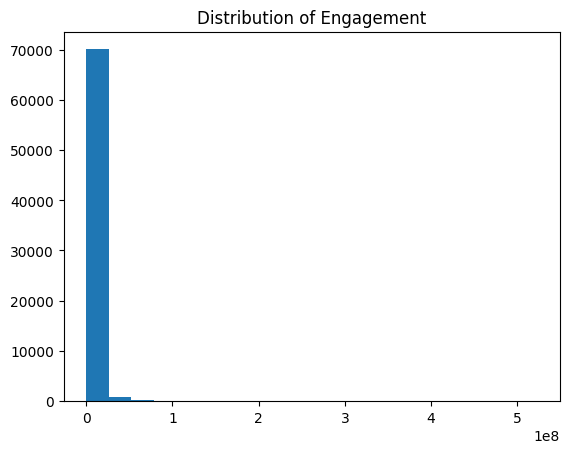

In [135]:
plt.figure()
plt.hist(hot_songs['Engagement'], bins = 20)
plt.title('Distribution of Engagement')
plt.show()

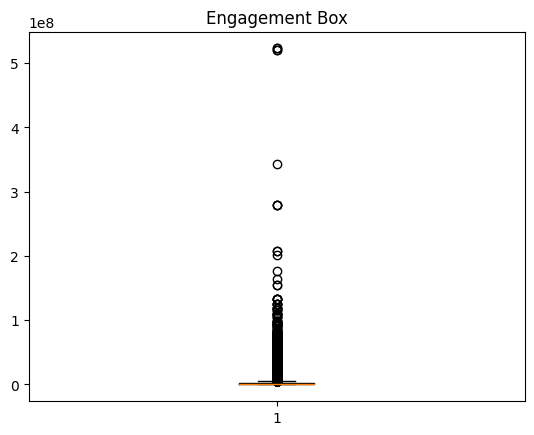

In [136]:
plt.figure()
plt.boxplot(hot_songs['Engagement'])
plt.title('Engagement Box')
plt.show()

In [137]:
hot_songs.shape

(71072, 21)

In [138]:
hot_songs = hot_songs[hot_songs['Engagement'] <= 5000000]

In [139]:
hot_songs.shape

(63220, 21)

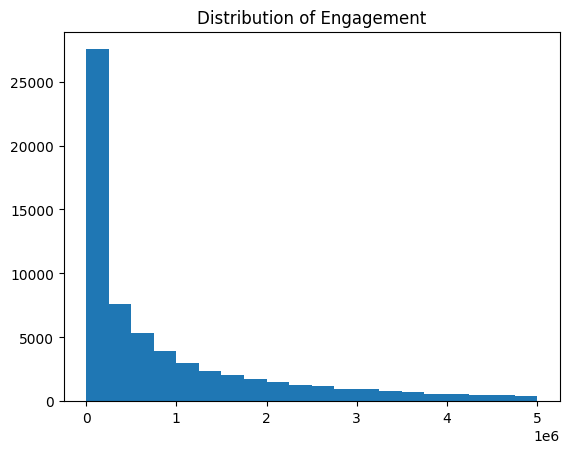

In [140]:
plt.figure()
plt.hist(hot_songs['Engagement'], bins = 20)
plt.title('Distribution of Engagement')
plt.show()

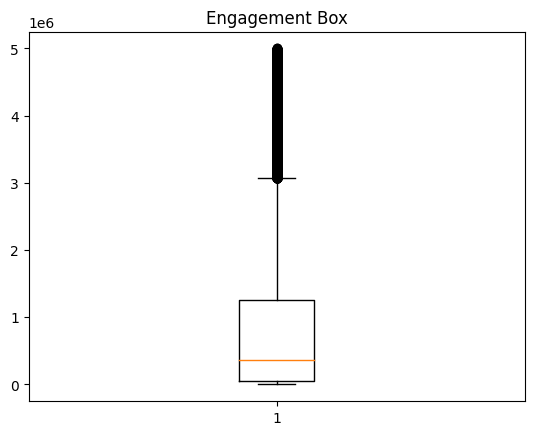

In [141]:
plt.figure()
plt.boxplot(hot_songs['Engagement'])
plt.title('Engagement Box')
plt.show()

In [142]:
orig_sounds = ['original sound', 'sonido original', 'som original', 'Originalton',
               'Original Sound', 'orijinal ses', 'son original', 'оригинальный звук']

In [143]:
no_orig = hot_songs[~hot_songs['Song Title'].isin(orig_sounds)]

In [144]:
no_orig['Window Pos'].mean()

57.72372905295135

# Remove Original Song

In [145]:
orig_sounds = ['original sound', 'sonido original', 'som original', 'Originalton',
               'Original Sound', 'orijinal ses', 'son original', 'оригинальный звук']

In [146]:
# Subset the df to remove "original sound" song titles.
no_orig = hot_songs[~hot_songs['Song Title'].isin(orig_sounds)]

In [147]:
# Sanity check.
no_orig['Window Pos'].mean()

57.72372905295135

In [148]:
no_orig['Song Uses'] = no_orig['Song Title'].apply(lambda x: (no_orig['Song Title'] == x).sum())

<ipython-input-148-be71dd8666bb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
no_orig.head()

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,...,Total Likes,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window,Window Pos,Days Since Debut
0,6892428462015958273,2020-11-07 17:02:37,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,...,4700000,211,14805,0.002005,612,2020-02-20 15:56:03,2020-11-08 00:18:38,261,99.884144,261
1,6891790235336822018,2020-11-05 23:46:00,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,...,4700000,211,60232,0.007432,612,2020-02-20 15:56:03,2020-11-08 00:18:38,261,99.226069,259
2,6891050048403049730,2020-11-03 23:53:42,john.cena10,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",الصوت الأصلي,6,7931,6,24,51200,...,4700000,211,59161,0.007961,612,2020-02-20 15:56:03,2020-11-08 00:18:38,261,98.462854,257
3,6890886086613126402,2020-11-03 13:17:25,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral']",الصوت الأصلي,15,3229,9,14,24700,...,4700000,211,27952,0.003252,612,2020-02-20 15:56:03,2020-11-08 00:18:38,261,98.293784,256
4,6890500322096123137,2020-11-02 12:20:27,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral', 'co...",الصوت الأصلي,23,8021,24,54,49600,...,4700000,211,57699,0.008099,612,2020-02-20 15:56:03,2020-11-08 00:18:38,261,97.896017,255


In [150]:
no_orig['Song Uses To Date'] = no_orig.groupby((no_orig['Song Title'] != no_orig['Song Title'].shift(1)).cumsum()).cumcount()+1


<ipython-input-150-7dee8cfc0d48>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [151]:
no_orig[no_orig['Song Title'] == 'Spooky, Scary Skeletons'].sort_values('Days Since Debut', ascending = True)

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,...,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window,Window Pos,Days Since Debut,Song Uses To Date
63608,6877345636019145989,2020-09-28 01:34:09,dukedepp,"['halloween2020', 'pumpkin', 'spookyscaryskele...","Spooky, Scary Skeletons",11,840600,4143,13600,3700000,...,67,4558343,0.225880,79,2019-10-30 18:47:14,2020-11-07 21:55:02,374,89.081926,333,7
63645,6877345636019145989,2020-09-28 01:34:09,dukedepp,"['halloween2020', 'pumpkin', 'spookyscaryskele...","Spooky, Scary Skeletons",11,840600,4143,13600,3700000,...,67,4558343,0.225880,79,2019-10-30 18:47:14,2020-11-07 21:55:02,374,89.081926,333,42
63668,6879064741982031105,2020-10-02 16:44:34,annamcnulty,"['halloween', 'flexible', 'spooky']","Spooky, Scary Skeletons",11,385600,4461,3616,2000000,...,194,2393677,0.075707,79,2019-10-30 18:47:14,2020-11-07 21:55:02,374,90.320059,337,63
63681,6878756639449632001,2020-10-01 20:48:59,neffatibrothers,[],"Spooky, Scary Skeletons",11,214600,405,543,1100000,...,653,1315548,0.017668,79,2019-10-30 18:47:14,2020-11-07 21:55:02,374,90.098141,337,74
63631,6879064741982031105,2020-10-02 16:44:34,annamcnulty,"['halloween', 'flexible', 'spooky']","Spooky, Scary Skeletons",11,385600,4461,3616,2000000,...,194,2393677,0.075707,79,2019-10-30 18:47:14,2020-11-07 21:55:02,374,90.320059,337,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63655,6892293863113903361,2020-11-07 08:20:19,the.marshmello.family,"['junya1gou', 'tiktokcombodia', 'combodia']","Spooky, Scary Skeletons",11,6880,3551,43,199200,...,136,209674,0.016799,79,2019-10-30 18:47:14,2020-11-07 21:55:02,374,99.848776,373,51
63618,6892293863113903361,2020-11-07 08:20:19,the.marshmello.family,"['junya1gou', 'tiktokcombodia', 'combodia']","Spooky, Scary Skeletons",11,6880,3551,43,199200,...,136,209674,0.016799,79,2019-10-30 18:47:14,2020-11-07 21:55:02,374,99.848776,373,16
63673,6892503677525839110,2020-11-07 21:55:02,owen.holt,[],"Spooky, Scary Skeletons",43,1207,6,31,6177,...,290,7421,0.000401,79,2019-10-30 18:47:14,2020-11-07 21:55:02,374,100.000000,374,68
63636,6892503677525839110,2020-11-07 21:55:02,owen.holt,[],"Spooky, Scary Skeletons",43,1207,6,31,6177,...,290,7421,0.000401,79,2019-10-30 18:47:14,2020-11-07 21:55:02,374,100.000000,374,33


In [152]:
no_orig[no_orig['Song Title'] == "Heart Don't Stand a Chance"]

,ID,Create Time,User,Hashtags,Song Title,Length,Likes,Shares,Comments,Views,...,Total Videos,Engagement,Engagement Rate,Song Uses,Min,Max,Window,Window Pos,Days Since Debut,Song Uses To Date
56976,6882552014010666246,2020-10-12 02:17:29,marcusolin,[],Heart Don't Stand a Chance,8,239100,246,609,1400000,...,792,1639955,0.020866,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,58.118904,34,1
56977,6870321980306885894,2020-09-09 03:18:22,mackzmusic,[],Heart Don't Stand a Chance,8,172300,316,744,723100,...,25,896460,0.157600,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,2.052214,1,2
56978,6877288162763230469,2020-09-27 21:51:06,babyariel,[],Heart Don't Stand a Chance,8,510200,851,2981,2700000,...,2291,3214032,0.014771,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,33.987824,19,3
56979,6891687651921988869,2020-11-05 17:08:50,markellwashington1,[],Heart Don't Stand a Chance,8,64600,49,205,287400,...,826,352254,0.015441,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,100.000000,58,4
56981,6870676305705192710,2020-09-10 02:13:20,just_addison_xd,[],Heart Don't Stand a Chance,8,291200,1565,3740,1300000,...,40,1596505,0.080136,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,3.676556,2,5
56982,6877514110922280197,2020-09-28 12:30:17,nytonystark,"['duet', 'catsoftiktok', 'pumpkin', 'holloween...",Heart Don't Stand a Chance,8,14500,37,218,179200,...,369,193955,0.003599,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,35.026464,20,6
56983,6871804809859697925,2020-09-13 03:12:28,andrew.davila,[],Heart Don't Stand a Chance,8,193100,767,1716,1100000,...,161,1295583,0.045484,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,8.849924,5,7
56984,6890693435833994497,2020-11-03 00:49:52,gemelasortega,[],Heart Don't Stand a Chance,7,176400,55,405,580100,...,540,756960,0.031028,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,95.441140,56,8
56985,6887421761705577729,2020-10-25 05:14:04,elyblancarte,[],Heart Don't Stand a Chance,8,291200,81,592,1900000,...,203,2191873,0.066335,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,80.442726,47,9
56986,6889196380187790594,2020-10-30 00:00:31,alejandroflrs14,[],Heart Don't Stand a Chance,8,97900,45,212,458100,...,192,556257,0.023941,42,2020-09-07 22:21:13,2020-11-05 17:08:50,58,88.578158,52,10


Text(0, 0.5, 'Video Count')

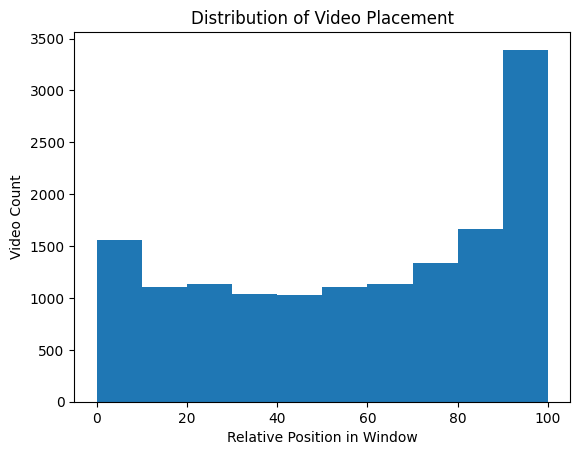

In [153]:
plt.figure()
plt.hist(no_orig['Window Pos'])
plt.title('Distribution of Video Placement')
plt.xlabel('Relative Position in Window')
plt.ylabel('Video Count')

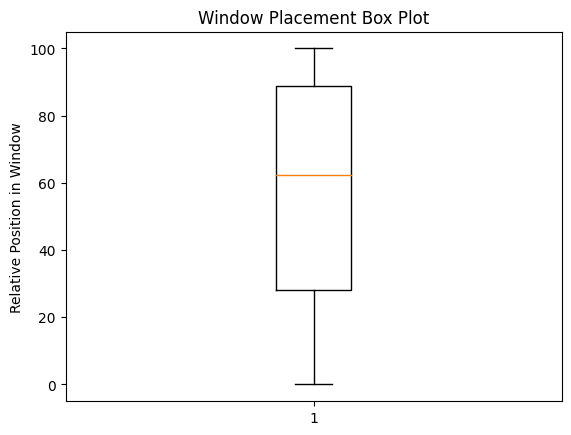

In [154]:
plt.figure()
plt.boxplot(no_orig['Window Pos'])
plt.title('Window Placement Box Plot')
plt.ylabel('Relative Position in Window')
plt.show()

In [155]:
fig = px.scatter(no_orig,
                 x = "Days Since Debut",
                 y = "Engagement",
                 trendline = "lowess",
                 trendline_options = dict(frac = .5),
                 trendline_color_override = 'red',
                 title="Engagement Over Window Position")
fig.show()

In [156]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output = True)

In [157]:
no_orig_hashtags = no_orig.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(no_orig['Hashtags'].str.replace('\W', '', regex = True)),
                index = no_orig.index,
                columns = mlb.classes_),
                rsuffix = '_h')

In [158]:
no_orig_songs = no_orig.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(no_orig['Song Title'].str.replace('\W', '', regex = True)),
                index = no_orig.index,
                columns = mlb.classes_),
                rsuffix = '_s')

In [159]:
no_orig_both = no_orig.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(no_orig['Hashtags'].str.replace('\W', '', regex = True)),
                index = no_orig.index,
                columns = mlb.classes_),
                rsuffix = '_h')

no_orig_both = no_orig.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(no_orig['Song Title'].str.replace('\W', '', regex = True)),
                index = no_orig.index,
                columns = mlb.classes_),
                rsuffix = '_s')


In [160]:
X_neither = no_orig.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title', 'Hashtags',
                                    'Create Time', 'Min', 'Views', 'Max', 'Likes',
                                    'Comments', 'Shares', 'Window', 'Window Pos', 'Engagement Rate',
                                    'Engagement'])
y_neither = no_orig['Engagement']

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
# Reserve test data.
X_remainder, X_test, y_remainder, y_test = train_test_split(X_neither, y_neither, test_size = .25, random_state = 42)

# Set aside validation data.
X_train, X_validation, y_train, y_validation = train_test_split(X_neither, y_neither, test_size = .25, random_state = 42)

In [163]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [164]:
my_lin = LinearRegression()
my_lin_results = my_lin.fit(X_train, y_train)
my_lin_results

my_lin.predict(X_validation)

print(my_lin.score(X_train, y_train))
my_lin.score(X_validation, y_validation)

0.261821039621569


0.24151698287261314

In [165]:
# Collect coefficients (betas).
coefs = pd.DataFrame(zip(X_neither.columns, my_lin.coef_))

In [166]:
coefs.sort_values(by = [1], ascending = False)

,0,1
1,Followers,621068.157417
2,Total Likes,80421.798239
0,Length,35157.191305
5,Song Uses To Date,-6914.250320
4,Days Since Debut,-68445.102881
3,Total Videos,-194167.823962


# Decision tree

In [167]:
accs = pd.DataFrame(columns = ['Depth', 'Accuracy'])

for d in range(1,20):


    my_tree = DecisionTreeRegressor(max_depth = d) # Instantiate.
    tree_mod = my_tree.fit(X_train, y_train) # Fit.
    my_tree.predict(X_validation) # Predict.
    my_tree.score(X_validation, y_validation) # Score.

    accs.loc[len(accs)] = [d, my_tree.score(X_validation, y_validation)] # Append scores to df.

best = accs['Accuracy'].max()
print(f'Best model accuracy is : {best}.')

Best model accuracy is : 0.5817217360079645.


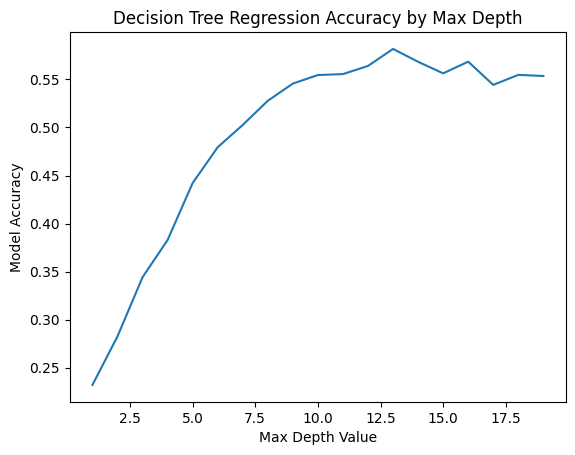

In [168]:
plt.figure()
plt.plot(accs['Depth'], accs['Accuracy'])
plt.title('Decision Tree Regression Accuracy by Max Depth')
plt.xlabel('Max Depth Value')
plt.ylabel('Model Accuracy')
plt.show()

In [169]:
accs[accs['Accuracy'] == accs['Accuracy'].max()]

,Depth,Accuracy
12,13.0,0.581722


# Random Forest

In [170]:
from sklearn.ensemble import RandomForestRegressor

my_random_forest = RandomForestRegressor()
my_random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [171]:
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_train, y_train))

print("Performance on Train data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_train, y_train)}")

Performance on Train data:
Average Decision Tree: 0.7544666782230113
Random Forest: 0.9591940005420768


In [172]:
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_validation, y_validation))

print("Performance on Validation data:")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_validation, y_validation)}")

Performance on Validation data:
Average Decision Tree: 0.33520049723293205
Random Forest: 0.7051564169383552


# Developing a Neural network

In [173]:
from sklearn.neural_network import MLPRegressor

In [174]:
# Fitting the multi-layer regressor.
regr = MLPRegressor(random_state=42, hidden_layer_sizes = (30, 20, 10, 10, 10, 5), max_iter=1000, solver = 'adam').fit(X_train, y_train)
regr.predict(X_validation)

print(regr.score(X_validation, y_validation))

0.4175426196965095


# TensorFlow Neural Network Modeling

In [175]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

# Random seeds for reproducibility.
tf.random.set_seed(42)

# Create a new sequential model.
model = keras.Sequential()

# Declare the hidden layers.
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer.
model.add(layers.Dense(1, activation = 'relu'))

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.mae,
    metrics=['mae']
)

history = model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [176]:
y_pred = model.predict(X_validation)

114/114 [==============================] - 0s 2ms/step


In [177]:
r2_score(y_validation, y_pred)

0.4072281867753831

In [178]:
train_accuracy = history.history['mae'][-1]
result = model.evaluate(X_validation, y_validation, verbose = 0)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {result[1]:.4f}')

Train Accuracy: 533969.1875
Test Accuracy: 556551.3125


# X_hypothesis

In [179]:
# Feature Set: With both Song Title and Hashtags binarized.
X_with_song_and_hashtags = no_orig_both.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title',
                                                        'Hashtags', 'Create Time', 'Min', 'Views',
                                                        'Max', 'Likes', 'Comments', 'Shares', 'Window',
                                                        'Window Pos', 'Engagement Rate', 'Engagement'])
y_with_song_and_hashtags = no_orig_both['Engagement']

In [180]:
# Feature Set: With Song Title binarized.
X_with_songs = no_orig_songs.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title', 'Hashtags',
                                             'Create Time', 'Min', 'Views', 'Max', 'Likes',
                                             'Comments', 'Shares', 'Window', 'Window Pos',
                                             'Engagement Rate', 'Engagement'])
y_with_songs = no_orig_songs['Engagement']

In [181]:
# Feature Set: With Hashtags binarized.
X_with_hashtags = no_orig_hashtags.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title', 'Hashtags',
                                                   'Create Time', 'Min', 'Views', 'Max', 'Likes',
                                                   'Comments', 'Shares', 'Window', 'Window Pos',
                                                   'Engagement Rate', 'Engagement'])
y_with_hashtags = no_orig_hashtags['Engagement']

In [182]:
# Feature Set: Excluding both Song Titles and Hashtags.
X_neither = no_orig.drop(columns = ['User', 'ID', 'Song Uses', 'Song Title', 'Hashtags',
                                    'Create Time', 'Min', 'Views', 'Max', 'Likes',
                                    'Comments', 'Shares', 'Window', 'Window Pos', 'Engagement Rate',
                                    'Engagement'])
y_neither = no_orig['Engagement']

In [183]:
# Create iterable list of X and y sets.
X_set = {'X With Songs and Hashes': X_with_song_and_hashtags,
         'X With Songs': X_with_songs,
         'X With Hashes': X_with_hashtags,
         'X Alone': X_neither}
y_set = {'y With Songs and Hashes': y_with_song_and_hashtags,
         'y With Songs': y_with_songs,
         'y With Hashes': y_with_hashtags,
         'y Alone': y_neither}

Result colleactor

In [184]:
# Create the empty container.
model_results = pd.DataFrame(columns = ['Feature Set', 'Model', 'R2 Accuracy'])

In [185]:
# Import statements for models.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor

In [186]:
ctr = 0 #Counter to leverage for list indexing.

for X in X_set.values():
    sets = ['With Song & Hashtags', 'With Song', 'With Hashtags', 'Neither']
    y =  list(y_set.values())[ctr]

    # Train, validation, test split.
    X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = .25, random_state = 42)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = .25, random_state = 42)
    # Scaling: instantiate scaler, fit, transform train and validation.
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_validation = scaler.transform(X_validation)

    # Linear Regression Model: instantiate, fit, predict.
    my_lin = LinearRegression()
    my_lin_results = my_lin.fit(X_train, y_train)
    my_lin.predict(X_validation)
    # Display results throughout iteration.
    print(f'Linear Regression Train Score: {round(my_lin.score(X_train, y_train), 4)}')
    print(f'Linear Regression Validation Score: {round(my_lin.score(X_validation, y_validation), 4)}')
    # Append train and validation R2 values to collection dataframe.
    model_results.loc[len(model_results)] = [sets[ctr],
                                         'Linear Regression',
                                         round(my_lin.score(X_validation, y_validation), 4)]

    # Decision Tree Model: instantiate, fit, predict.
    my_tree = DecisionTreeRegressor(max_depth = 7)
    tree_mod = my_tree.fit(X_train, y_train)
    my_tree.predict(X_validation)
    # Display results throughout iteration.
    print(f'Decision Tree Regressor Train Score: {round(my_tree.score(X_train, y_train), 4)}')
    print(f'Decision Regressor Validation Score: {round(my_tree.score(X_validation, y_validation), 4)}')
    # Append train and validation R2 values to collection dataframe.
    model_results.loc[len(model_results)] = [sets[ctr],
                                         'Decision Tree Reg',
                                         round(my_tree.score(X_validation, y_validation), 4)]

    # Random Forest Regressor Train: instantiate, fit.
    my_random_forest = RandomForestRegressor()
    my_random_forest.fit(X_train, y_train)
    decision_tree_scores = []
    for sub_tree in my_random_forest.estimators_:
        decision_tree_scores.append(round(sub_tree.score(X_train, y_train), 4))
    # Display results throughout iteration.
    print(f"Training Mean Decision Tree: {round(np.mean(decision_tree_scores), 4)}")
    print(f"Training Random Forest: {round(my_random_forest.score(X_train, y_train), 4)}")
    # Random Forest Regressor Train: instantiate, fit.
    decision_tree_scores = [] # Refresh to clear training results.
    for sub_tree in my_random_forest.estimators_:
        decision_tree_scores.append(round(sub_tree.score(X_validation, y_validation), 4))
    # Display results throughout iteration.
    print(f"Validation Mean Decision Tree: {round(np.mean(decision_tree_scores), 4)}")
    print(f"Validation Random Forest: {round(my_random_forest.score(X_validation, y_validation), 4)}")
    # Append train and validation R2 values to collection dataframe.
    model_results.loc[len(model_results)] = [sets[ctr],
                                         'Random Forest Reg',
                                         round(my_random_forest.score(X_validation, y_validation), 4)]


    # Neural Network multi-layer regressor: fit, predict.
    regr = MLPRegressor(random_state = 42,
                        hidden_layer_sizes = (20, 10, 10, 5, 5, 3),
                        max_iter = 1000, solver = 'adam').fit(X_train, y_train)
    regr.predict(X_validation)
    # Display results throughout iteration.
    print(f'Neural Net Regressor: {round(regr.score(X_validation, y_validation), 4)}')
    # Append train and validation R2 values to collection dataframe.
    model_results.loc[len(model_results)] = [sets[ctr],
                                         'Neural Network MLP',
                                         round(regr.score(X_validation, y_validation), 4)]
    ctr += 1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



Linear Regression Train Score: 0.29
Linear Regression Validation Score: 0.2695
Decision Tree Regressor Train Score: 0.5306
Decision Regressor Validation Score: 0.4953
Training Mean Decision Tree: 0.7751
Training Random Forest: 0.966
Validation Mean Decision Tree: 0.3935
Validation Random Forest: 0.7556


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Neural Net Regressor: 0.4548


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



Linear Regression Train Score: 0.29
Linear Regression Validation Score: 0.2695
Decision Tree Regressor Train Score: 0.5306
Decision Regressor Validation Score: 0.4944
Training Mean Decision Tree: 0.7758
Training Random Forest: 0.9656
Validation Mean Decision Tree: 0.3915
Validation Random Forest: 0.7561


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Neural Net Regressor: 0.4548


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning:

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.



Linear Regression Train Score: 0.3001
Linear Regression Validation Score: -2.5658513891518876e+25
Decision Tree Regressor Train Score: 0.5411
Decision Regressor Validation Score: 0.5013
Training Mean Decision Tree: 0.7639
Training Random Forest: 0.962
Validation Mean Decision Tree: 0.3689
Validation Random Forest: 0.734


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Neural Net Regressor: -0.7469
Linear Regression Train Score: 0.2618
Linear Regression Validation Score: 0.2415
Decision Tree Regressor Train Score: 0.5322
Decision Regressor Validation Score: 0.5001
Training Mean Decision Tree: 0.7544
Training Random Forest: 0.9589
Validation Mean Decision Tree: 0.3331
Validation Random Forest: 0.7049
Neural Net Regressor: 0.4329


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [187]:
# Display results.
model_results

,Feature Set,Model,R2 Accuracy
0,With Song & Hashtags,Linear Regression,2.695000e-01
1,With Song & Hashtags,Decision Tree Reg,4.953000e-01
2,With Song & Hashtags,Random Forest Reg,7.556000e-01
3,With Song & Hashtags,Neural Network MLP,4.548000e-01
4,With Song,Linear Regression,2.695000e-01
5,With Song,Decision Tree Reg,4.944000e-01
6,With Song,Random Forest Reg,7.561000e-01
7,With Song,Neural Network MLP,4.548000e-01
8,With Hashtags,Linear Regression,-2.565851e+25
9,With Hashtags,Decision Tree Reg,5.013000e-01


In [188]:
# Extract best performing model by R2 score.
model_results[model_results['R2 Accuracy'] == model_results['R2 Accuracy'].max()]

,Feature Set,Model,R2 Accuracy
6,With Song,Random Forest Reg,0.7561


In [189]:
# Eyeball top 3 performing models.
model_results['R2 Accuracy'].sort_values(ascending = False).head(3)

6     0.7561
2     0.7556
10    0.7340
Name: R2 Accuracy, dtype: float64

# Trend Research

In [190]:
# Create dataframe grouping by Song Title and Days Since Debut.
by_song = no_orig.groupby(['Song Title', 'Days Since Debut']).sum('Engagement').reset_index()

In [191]:
import plotly.express as px
# Plot Engagement over trend duration by Song Title.
fig = px.line(by_song, x = "Days Since Debut", y = "Engagement",
              title = 'Engagement over Song Usage',
              color = 'Song Title',
             width = 1000,
             height = 400)
fig.show()

In [192]:
# Re-plot limiting engagement to 10M.
fig = px.line(by_song[by_song['Engagement'] <= 10000000], x = "Days Since Debut", y = "Engagement",
              title = 'Engagement over Song Usage',
              color = 'Song Title',
             width = 1000,
             height = 400)
fig.show()

In [193]:
# Plot Engagement over trend duration.
fig = px.scatter(by_song[by_song['Engagement'] <= 10000000],
                 x = "Days Since Debut",
                 y = "Engagement",
                 trendline = "expanding",
                 #trendline_options = dict(window = 10),
                 trendline_color_override = 'red',
                 title="Engagement Over Trend Lifecycle")
fig.show()